In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [75]:
#import csv files
df_fraud = pd.read_csv('../data/raw/Fraud_Data.csv')
df_transactions = pd.read_csv('../data/raw/creditcard.csv')  
df_ip = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

EDA on fraud_data

In [76]:
print(df_fraud.info())
# number of rows and columns on fraud_data
print("number of rows and columns",df_fraud.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None
number of rows and columns (151112, 11)


C:\Users\nebiy\AppData\Local\Temp\ipykernel_2780\2661765564.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_fraud, palette='Set1')


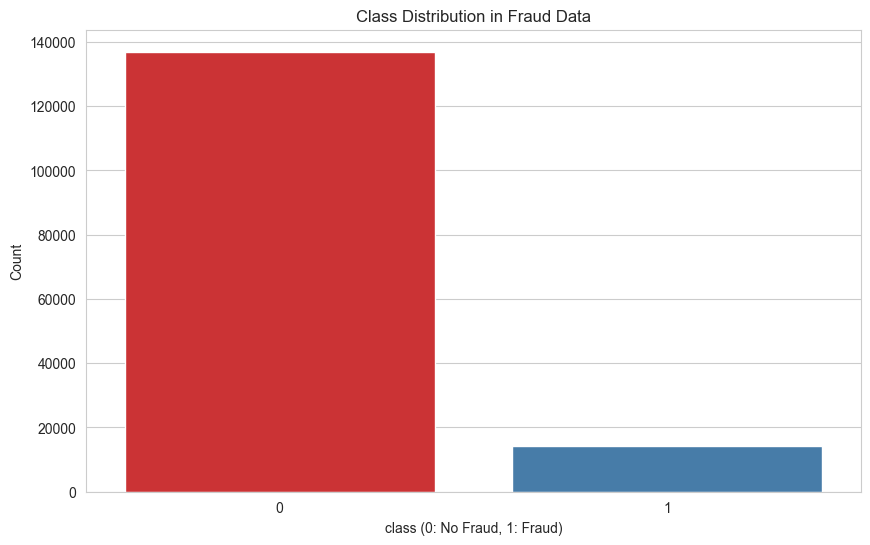

In [77]:
#Count and plot class 0 vs 1.

plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df_fraud, palette='Set1')
plt.title('Class Distribution in Fraud Data')
plt.xlabel('class (0: No Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

In [78]:
#Calculate fraud ratio (class == 1) to know just how skewed it is.
fraud_ratio = df_fraud['class'].value_counts(normalize=True)
print("Fraud Ratio (class 1):", fraud_ratio[1])

Fraud Ratio (class 1): 0.09364577267192546


In [79]:
#Convert signup_time and purchase_time to datetime.

df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'], errors='coerce')
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'], errors='coerce')

In [80]:
# how long does it take to make a purchase after signup?
df_fraud['time_to_purchase'] = (df_fraud['purchase_time'] - df_fraud['signup_time']).dt.total_seconds() / 3600  # convert to hours

In [81]:
# Hour of day, day of week, weekday/weekend, etc.
df_fraud['purchase_hour'] = df_fraud['purchase_time'].dt.hour
df_fraud['purchase_dayofweek'] = df_fraud['purchase_time'].dt.dayofweek
df_fraud['is_weekend'] = df_fraud['purchase_dayofweek'].isin([5, 6])




In [82]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_to_purchase,purchase_hour,purchase_dayofweek,is_weekend
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1251.856111,2,5,True
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,4.984444,1,0,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.000278,18,3,False
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,136.690278,13,0,False
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1211.516944,18,2,False


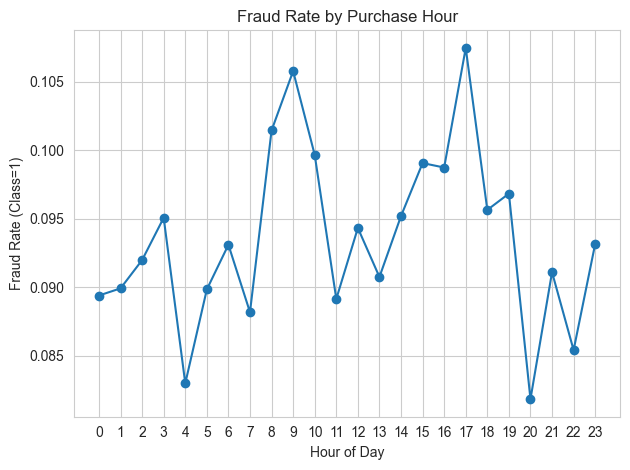

In [83]:
# Group by hour and calculate fraud ratio
fraud_ratio = df_fraud.groupby('purchase_hour')['class'].mean()

# Plot
plt.plot(fraud_ratio.index, fraud_ratio.values, marker='o')
plt.title('Fraud Rate by Purchase Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate (Class=1)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

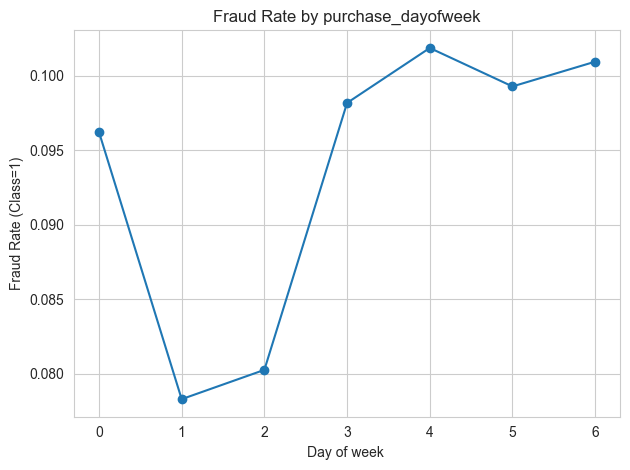

In [84]:
# Group by hour and calculate fraud ratio
fraud_ratio = df_fraud.groupby('purchase_dayofweek')['class'].mean()

# Plot
plt.plot(fraud_ratio.index, fraud_ratio.values, marker='o')
plt.title('Fraud Rate by purchase_dayofweek')
plt.xlabel('Day of week ')
plt.ylabel('Fraud Rate (Class=1)')
plt.grid(True)
plt.xticks(range(0, 7))
plt.tight_layout()
plt.show()

In [85]:
# Calculate and display the percentage of frauds for weekend and weekday transactions
weekend_fraud_pct = df_fraud[df_fraud['is_weekend'] & (df_fraud['class'] == 1)].shape[0] / df_fraud[df_fraud['is_weekend']].shape[0] * 100
weekday_fraud_pct = df_fraud[~df_fraud['is_weekend'] & (df_fraud['class'] == 1)].shape[0] / df_fraud[~df_fraud['is_weekend']].shape[0] * 100
print(f"Fraud percentage on weekends: {weekend_fraud_pct:.2f}%")
print(f"Fraud percentage on weekdays: {weekday_fraud_pct:.2f}%")

Fraud percentage on weekends: 10.01%
Fraud percentage on weekdays: 9.10%


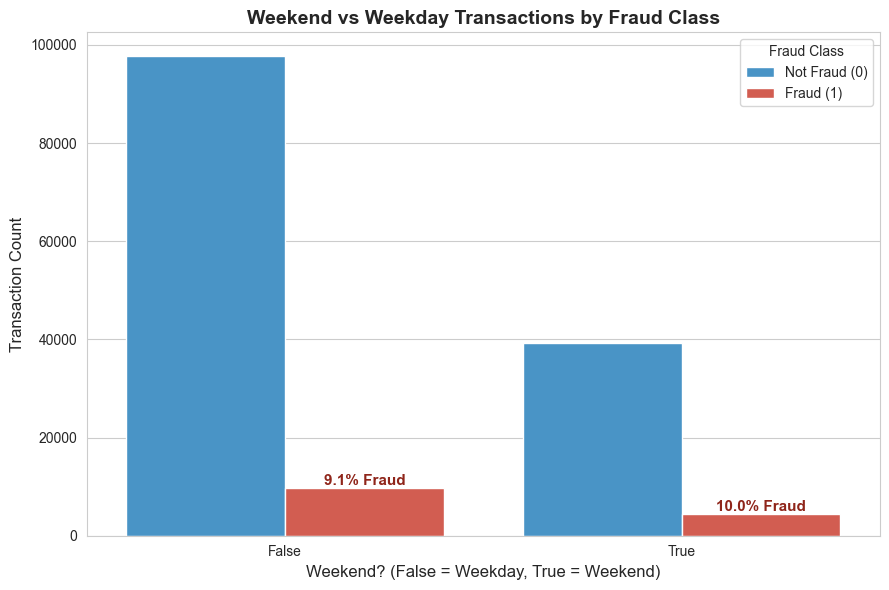

In [86]:

plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")

# Draw the countplot
ax = sns.countplot(
    x='is_weekend',
    hue='class',
    data=df_fraud,
    palette={0: '#3498db', 1: '#e74c3c'},  # Blue for legit, red for fraud
    dodge=True
)

# Title and axis labels
plt.title('Weekend vs Weekday Transactions by Fraud Class', fontsize=14, fontweight='bold')
plt.xlabel('Weekend? (False = Weekday, True = Weekend)', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.legend(title='Fraud Class', labels=['Not Fraud (0)', 'Fraud (1)'])

# Annotate fraud percentage
for i, is_weekend_val in enumerate([False, True]):
    total = df_fraud[df_fraud['is_weekend'] == is_weekend_val].shape[0]
    frauds = df_fraud[(df_fraud['is_weekend'] == is_weekend_val) & (df_fraud['class'] == 1)].shape[0]
    pct = 100 * frauds / total if total > 0 else 0
    # Fraud bar is always the second one in each group (i + 2)
    bar = ax.patches[i + 2]
    ax.annotate(f'{pct:.1f}% Fraud',
                (bar.get_x() + bar.get_width()/2, bar.get_height() + 2),
                ha='center', va='bottom',
                fontsize=11, fontweight='bold',
                color="#8f251a")

plt.tight_layout()
plt.show()


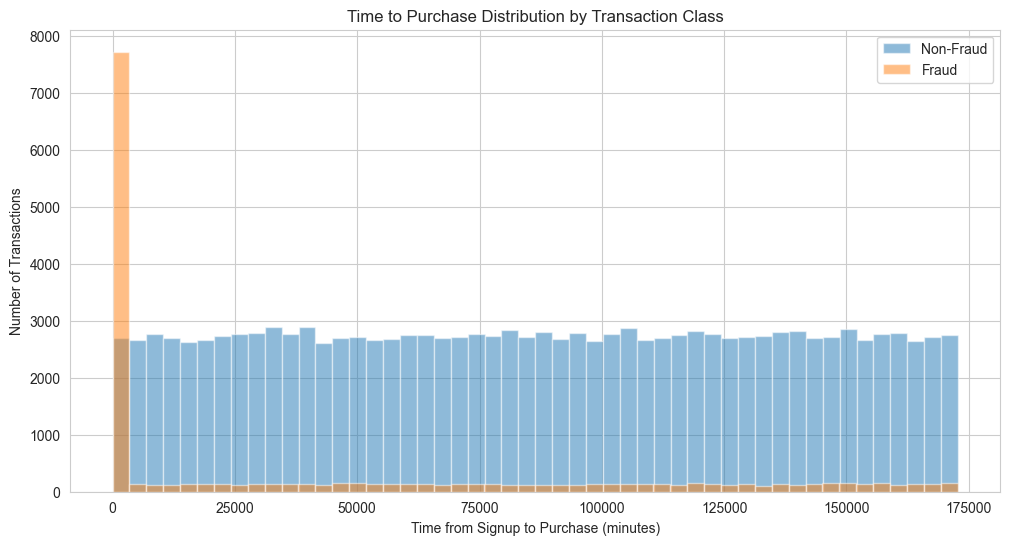

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# ASSUME df IS YOUR DATAFRAME WITH signup_time, purchase_time, AND class COLUMNS

# 1. CONVERT signup_time AND purchase_time TO DATETIME (IF NOT ALREADY)
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'])

# 2. CALCULATE time_to_purchase IN MINUTES
df_fraud['time_to_purchase'] = (df_fraud['purchase_time'] - df_fraud['signup_time']).dt.total_seconds() / 60

# 3. PLOT DISTRIBUTION OF time_to_purchase FOR FRAUD AND NON-FRAUD
plt.figure(figsize=(12,6))

# NON-FRAUD (class=0)
plt.hist(df_fraud[df_fraud['class'] == 0]['time_to_purchase'], bins=50, alpha=0.5, label='Non-Fraud')

# FRAUD (class=1)
plt.hist(df_fraud[df_fraud['class'] == 1]['time_to_purchase'], bins=50, alpha=0.5, label='Fraud')

plt.xlabel('Time from Signup to Purchase (minutes)')
plt.ylabel('Number of Transactions')
plt.title('Time to Purchase Distribution by Transaction Class')
plt.legend()
plt.show()


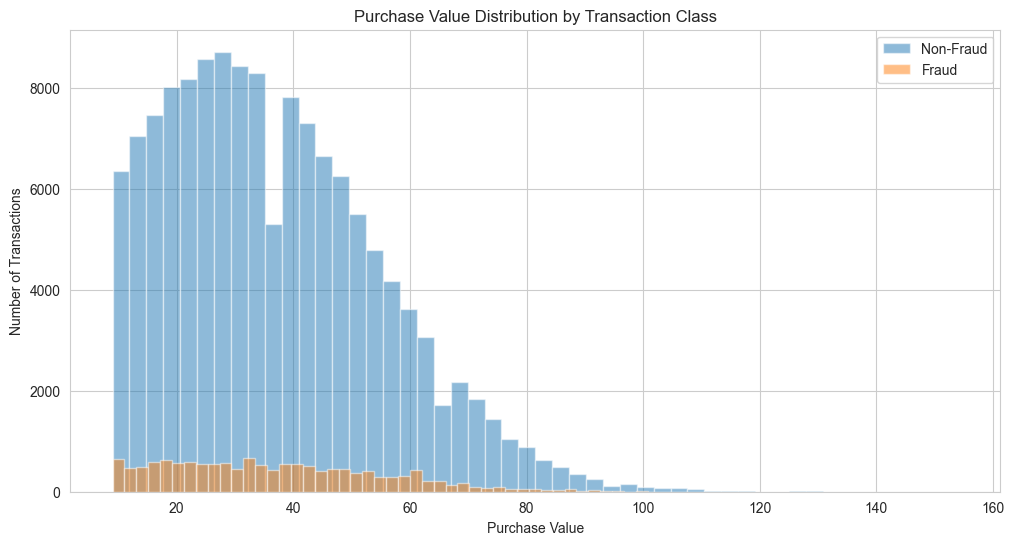

In [88]:
# Plot histograms or KDE plots for purchase_value by fraud/non-fraud.

plt.figure(figsize=(12,6))
# NON-FRAUD (class=0)
plt.hist(df_fraud[df_fraud['class'] == 0]['purchase_value'], bins=50, alpha=0.5, label='Non-Fraud')
# FRAUD (class=1)
plt.hist(df_fraud[df_fraud['class'] == 1]['purchase_value'], bins=50, alpha=0.5, label='Fraud')
plt.xlabel('Purchase Value')
plt.ylabel('Number of Transactions')
plt.title('Purchase Value Distribution by Transaction Class')
plt.legend()
plt.show()

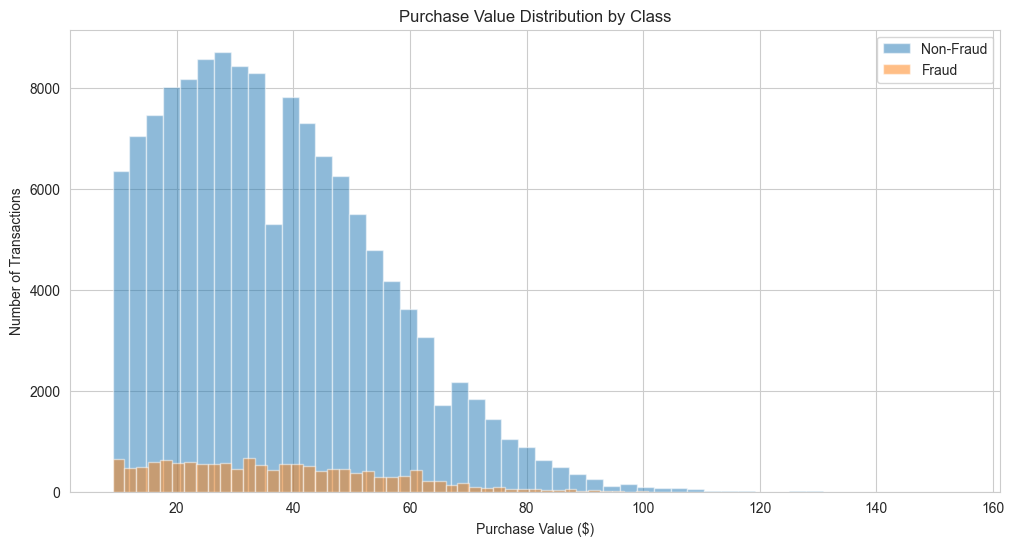

In [89]:


plt.figure(figsize=(12,6))

# Plot regular purchase_value distributions
plt.hist(df_fraud[df_fraud['class'] == 0]['purchase_value'], bins=50, alpha=0.5, label='Non-Fraud')
plt.hist(df_fraud[df_fraud['class'] == 1]['purchase_value'], bins=50, alpha=0.5, label='Fraud')

plt.xlabel('Purchase Value ($)')
plt.ylabel('Number of Transactions')
plt.title('Purchase Value Distribution by Class')
plt.legend()
plt.show()




In [90]:
df_fraud.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'time_to_purchase', 'purchase_hour', 'purchase_dayofweek',
       'is_weekend'],
      dtype='object')

In [91]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_to_purchase,purchase_hour,purchase_dayofweek,is_weekend
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,75111.366667,2,5,True
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,299.066667,1,0,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.016667,18,3,False
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,8201.416667,13,0,False
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,72691.016667,18,2,False


In [94]:
# count df_fraud with nan ip_address
nan_ip_count = df_fraud['ip_address'].isna().sum()
print(f"Number of transactions with NaN ip_address: {nan_ip_count}")

Number of transactions with NaN ip_address: 0


In [95]:
print(df_ip[['lower_bound_ip_address', 'upper_bound_ip_address']].describe())


       lower_bound_ip_address  upper_bound_ip_address
count            1.388460e+05            1.388460e+05
mean             2.724532e+09            2.724557e+09
std              8.975215e+08            8.974979e+08
min              1.677722e+07            1.677747e+07
25%              1.919930e+09            1.920008e+09
50%              3.230887e+09            3.230888e+09
75%              3.350465e+09            3.350466e+09
max              3.758096e+09            3.758096e+09


In [97]:
df_fraud.to_csv('../data/processed/df_fraud_processed.csv', index=False)